<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_methane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Methane (CH₄)**

[Methane](https://en.m.wikipedia.org/wiki/Methane) (CH₄) has a Tetrahedral geometry with equal C-H bond lengths.

![science](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Methane-2D-dimensions.svg/320px-Methane-2D-dimensions.svg.png)

In [ ]:
!pip install pyscf geometric -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

In [2]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    C  0.000000  0.000000  0.000000
    H  0.629118  0.629118  0.629118
    H -0.629118 -0.629118  0.629118
    H -0.629118  0.629118 -0.629118
    H  0.629118 -0.629118 -0.629118
'''

# Name
molecule = 'Methane (CH₄)'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = False  # Set false, otherwise geometry optimization doesnt work
mol.spin = 0          # Methane is a stable, closed-shell molecule. All valence electrons are involved in C-H bonds and are paired
# All valence electrons are paired (8 valence electrons total). Ground state is a singlet. mol.spin = 0 (since S=0, 2S=0)
mol.build()

In [14]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Methane (CH₄) molecule symmetry:
 Top group: Td
 Group name: D2
--------------------


Point Group Symmetry
* **Shape:** Tetrahedral
* **Symmetry Operations:** Four $C_3$ axes, three $C_2$ axes, six $S_4$ improper rotation axes, and six mirror planes ($\sigma_d$).
* **Point Group:** **$T_d$**
* *Far from linear.*

In [15]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -40.1987085424814


np.float64(-40.19870854248139)

converged SCF energy = -40.1987085424815


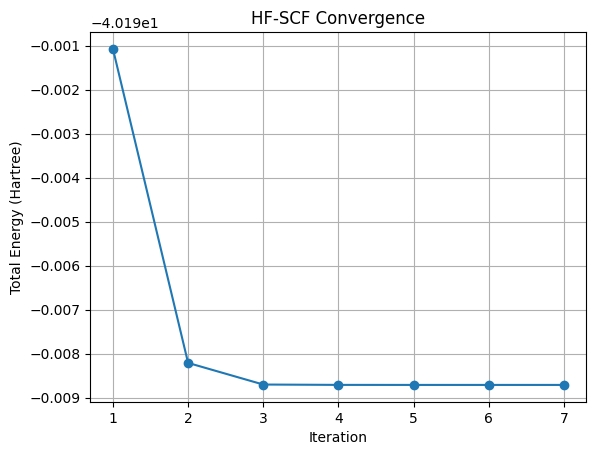

Ground state energy for Methane (CH₄): -40.19870854248154 Hartree


In [6]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [16]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -40.5160837943046


np.float64(-40.51608379430457)

In [17]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -40.1987085424815
E(MP2) = -40.362822614892  E_corr = -0.164114072410515
E(SCS-MP2) = -40.3686251075257  E_corr = -0.169916565044203
MP2 energy: -0.16411407241051545 Hartree


In [18]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -40.1987085424814
E(CCSD) = -40.38613556761174  E_corr = -0.1874270251302897
CCSD(T) correction = -0.00374620922576263


In [11]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -40.1987085424813
Excited State energies (eV)
[12.72394509 12.72394509 12.72394509]

** Singlet excitation energies and oscillator strengths **
Excited State   1:   B1     12.72395 eV     97.44 nm  f=0.3932
Excited State   2:   B2     12.72395 eV     97.44 nm  f=0.3932
Excited State   3:   B3     12.72395 eV     97.44 nm  f=0.3932


In [19]:
# Geometry Optimization (in Angstroms) with HF or DFT
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-517a255e-39b9-498f-919d-b1d788402c67.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.629118   0.629118   0.629118    0.000000  0.000000  0.000000
   H  -0.629118  -0.629118   0.629118    0.000000  0.000000  0.000000
   H  -0.629118   0.629118  -0.629118    0.000000  0.000000  0.000000
   H   0.629118  -0.629118  -0.629118    0.000000  0.000000  0.000000
converged SCF energy = -40.1987085424816
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000000000     0.0000000000    -0.0000000000
1 H    -0.0004686254    -0.0004686254    -0.0004686254
2 H     0.0004686254     0.0004686254    -0.0004686254
3 H     0.0004686254    -0.0004686254     0.0004686254
4 H    -0.0004686254     0.0004686254     0.0004686254
----------------------------------------------
cycle 1: E = -40.1987085425  dE = -40.1987  norm(grad) = 0.0

Step    0 : Gradient = 7.260e-04/8.117e-04 (rms/max) Energy = -40.1987085425
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 3.48515e-01 3.48515e-01 3.48515e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000  -0.000000  -0.000000    0.000000 -0.000000 -0.000000
   H   0.629830   0.629830   0.629830    0.000712  0.000712  0.000712
   H  -0.629830  -0.629830   0.629830   -0.000712 -0.000712  0.000712
   H  -0.629830   0.629830  -0.629830   -0.000712  0.000712 -0.000712
   H   0.629830  -0.629830  -0.629830    0.000712 -0.000712 -0.000712
converged SCF energy = -40.1987119439091
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000000000    -0.0000000000    -0.0000000000
1 H     0.0000465180     0.0000465180     0.0000465180
2 H    -0.0000465180    -0.0000465180     0.0000465180
3 H    -0.0000465180     0.0000465180    -0.0000465180
4 H     0.0000465180    -0.0000465180    -0.0000465180
----------------------------------------------
cycle 2: E = -40.1987119439  dE = -3.40143e-06  norm(grad) =

Step    1 : Displace = 1.102e-03/1.232e-03 (rms/max) Trust = 1.000e-01 (=) Grad = 7.207e-05/8.057e-05 (rms/max) E (change) = -40.1987119439 (-3.401e-06) Quality = 0.900
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 3.48515e-01 3.48515e-01 3.83110e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000  -0.000000   0.000000   -0.000000  0.000000  0.000000
   H   0.629765   0.629765   0.629765   -0.000064 -0.000064 -0.000064
   H  -0.629765  -0.629765   0.629765    0.000064  0.000064 -0.000064
   H  -0.629765   0.629765  -0.629765    0.000064 -0.000064  0.000064
   H   0.629765  -0.629765  -0.629765   -0.000064  0.000064  0.000064
converged SCF energy = -40.1987119778076
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000000000    -0.0000000000     0.0000000000
1 H    -0.0000000272    -0.0000000272    -0.0000000272
2 H     0.0000000272     0.0000000272    -0.0000000272
3 H     0.0000000272    -0.0000000272     0.0000000272
4 H    -0.0000000272     0.0000000272     0.0000000272
----------------------------------------------
cycle 3: E = -40.1987119778  dE = -3.38985e-08  norm(grad) =

Step    2 : Displace = 9.954e-05/1.113e-04 (rms/max) Trust = 1.414e-01 (+) Grad = 4.206e-08/4.703e-08 (rms/max) E (change) = -40.1987119778 (-3.390e-08) Quality = 1.000
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 3.48515e-01 3.48515e-01 3.83110e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 1.908 seconds


[[ 1.06020538e-14 -6.97695238e-15  9.03489990e-14]
 [ 1.19008393e+00  1.19008393e+00  1.19008393e+00]
 [-1.19008393e+00 -1.19008393e+00  1.19008393e+00]
 [-1.19008393e+00  1.19008393e+00 -1.19008393e+00]
 [ 1.19008393e+00 -1.19008393e+00 -1.19008393e+00]]


converged SCF energy = -40.1987085424814


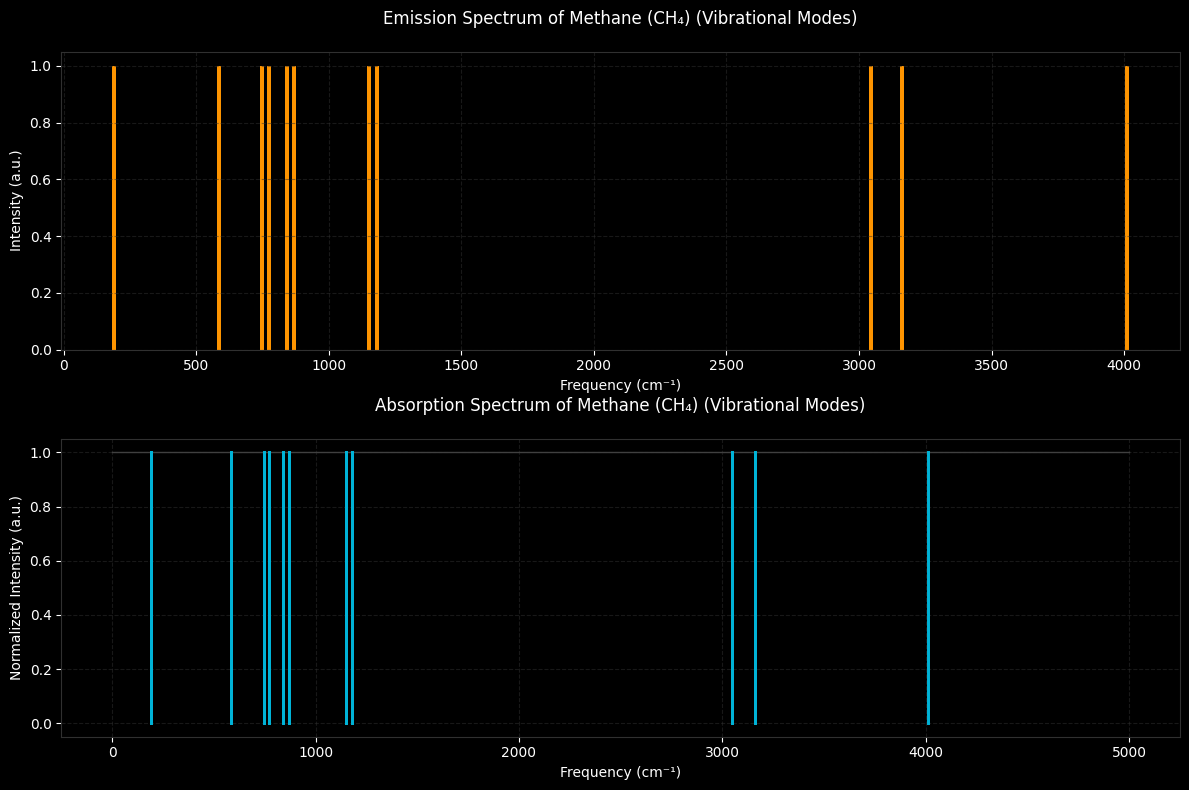

In [20]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()